In [1]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from textblob import TextBlob
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
stop_words = set(stopwords.words("english"))

In [3]:
data = pd.read_csv('hubspotCombined.csv')
print ("Original 'reviews_ioCombined.csv' CSV Data: \n")
data

Original 'reviews_ioCombined.csv' CSV Data: 



,User Review,Star Rating,Date
0,très bien mais je cherche le SAV HubSpot pour ...,4 of 5,Dec 8 2021
1,My emails are not being tracked in HubSpot eve...,2 of 5,Dec 7 2021
2,sync works well from all devices mobile and de...,5 of 5,Dec 7 2021
3,SuperSuperSuperSuperSuperSuperSuperSuperSuperS...,5 of 5,Dec 7 2021
4,Gmail is fine. It does what I need from an ema...,2 of 5,Dec 6 2021
...,...,...,...
575,Working fine but HubSpot integration is very i...,2 of 5,Jul 13 2020
576,yet to see its benefits figuring out how to le...,5 of 5,Jul 13 2020
577,Logging/Tracking Gmail activity as a sales rep...,4 of 5,Jul 13 2020
578,The HubSpot-Gmail integration makes it easy to...,5 of 5,Jul 13 2020


In [5]:
comments = []
with open ("hubspotCombined.csv", "r", encoding ='utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['User Review', 'Star Rating', 'Date']
['très bien mais je cherche le SAV HubSpot pour mes questions techniques - très bien mais je cherche le SAV HubSpot pour mes questions techniques', '4 of 5', 'Dec 8 2021']
['My emails are not being tracked in HubSpot even though I have tracking turned on.', '2 of 5', 'Dec 7 2021']
["sync works well from all devices mobile and desktop. It's important for me to have all activities on HubSpot", '5 of 5', 'Dec 7 2021']
['SuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuper', '5 of 5', 'Dec 7 2021']
['Gmail is fine. It does what I need from an email and a calendar. However getting the features that I value working with HS has been a challenge.', '2 of 5', 'Dec 6 2021']
['Sim pois usamos o Gmail tanto para entrar em contato com novos clientes quanto para responder as pessoas que já são nossos clientes.', '5 of 5', 'Dec 6 2021']
["Ca se désactive constamment. Du coup mon objectif n'est pas atteint. J'envoie des mails mais

In [6]:
review = comments[0]
print (review)

['User Review', 'Star Rating', 'Date']


In [7]:
del comments[0]
comments

[['très bien mais je cherche le SAV HubSpot pour mes questions techniques - très bien mais je cherche le SAV HubSpot pour mes questions techniques',
  '4 of 5',
  'Dec 8 2021'],
 ['My emails are not being tracked in HubSpot even though I have tracking turned on.',
  '2 of 5',
  'Dec 7 2021'],
 ["sync works well from all devices mobile and desktop. It's important for me to have all activities on HubSpot",
  '5 of 5',
  'Dec 7 2021'],
 ['SuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuperSuper',
  '5 of 5',
  'Dec 7 2021'],
 ['Gmail is fine. It does what I need from an email and a calendar. However getting the features that I value working with HS has been a challenge.',
  '2 of 5',
  'Dec 6 2021'],
 ['Sim pois usamos o Gmail tanto para entrar em contato com novos clientes quanto para responder as pessoas que já são nossos clientes.',
  '5 of 5',
  'Dec 6 2021'],
 ["Ca se désactive constamment. Du coup mon objectif n'est pas atteint. J'envoie des mails mais i

In [32]:
review = comments[5][0].lower()
print (review)
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

sim pois usamos o gmail tanto para entrar em contato com novos clientes quanto para responder as pessoas que já são nossos clientes.
Sentiment(polarity=0.0, subjectivity=0.0)


In [33]:
TextBlob("bonjour").translate(to="en")

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [37]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[0])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

<function matplotlib.pyplot.show(close=None, block=None)>

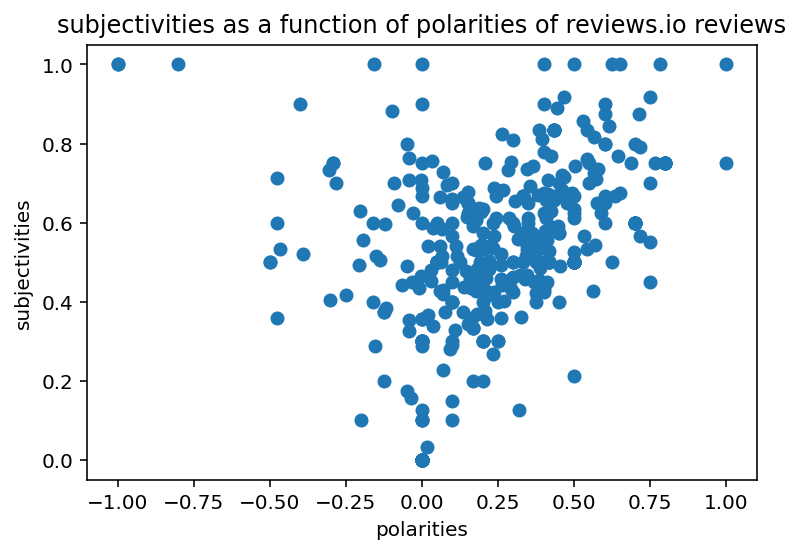

In [38]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of reviews.io reviews")
plt.show

In [39]:
data ["subjectivity"] = subjectivities 
data ["polarity"] = polarities
data

,User Review,Star Rating,Date,subjectivity,polarity
0,très bien mais je cherche le SAV HubSpot pour ...,4 of 5,Dec 8 2021,0.000000,0.000000
1,My emails are not being tracked in HubSpot eve...,2 of 5,Dec 7 2021,0.000000,0.000000
2,sync works well from all devices mobile and de...,5 of 5,Dec 7 2021,1.000000,0.400000
3,SuperSuperSuperSuperSuperSuperSuperSuperSuperS...,5 of 5,Dec 7 2021,0.000000,0.000000
4,Gmail is fine. It does what I need from an ema...,2 of 5,Dec 6 2021,0.500000,0.416667
...,...,...,...,...,...
575,Working fine but HubSpot integration is very i...,2 of 5,Jul 13 2020,0.489236,-0.048611
576,yet to see its benefits figuring out how to le...,5 of 5,Jul 13 2020,0.500000,0.500000
577,Logging/Tracking Gmail activity as a sales rep...,4 of 5,Jul 13 2020,0.000000,0.000000
578,The HubSpot-Gmail integration makes it easy to...,5 of 5,Jul 13 2020,0.577778,0.402778
